<a href="https://colab.research.google.com/github/KulsoomBibi/DataScienceWithAtomCamp/blob/main/Fashion_Mnist_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

**Importing Fashion Mnist Dataset**

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Visualizing Dataset**

In [4]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
single_image = x_train[5]
single_image

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  88, 221, 215, 217, 219, 211, 185, 150, 118,
        107,  99,  88,  83,  90, 135, 212, 203, 207, 219, 169,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  27, 118, 162,  40,   0,   0,   0,  10,
         19,  28,  39,  47,  36,   0,   0, 203, 230, 220, 203,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 138, 136,  71,  69,  54, 216, 217, 203, 184,
        168, 163, 162, 163, 178, 221, 186,  38,  26,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  67, 134, 154, 224, 129,  66,  81, 117, 129,
        128, 132, 137, 131, 129,  86,  73, 157, 151, 134, 216,  18,   0,
          0,   0],
       [  0,   0,   0,   0, 203, 198, 172, 183, 206, 255, 255, 250, 243,
        240, 239, 235, 238, 244, 255, 238, 184, 160,  86,  98,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 122, 188, 224, 151, 105, 127,  97, 100, 105,
        114, 117, 117, 113, 103,  98, 111, 142, 254, 191, 255,  49,   0,
          0,   0],
       [  0,   0,   0,   0, 163, 179, 200,  95, 154, 198, 197, 200, 200,
        198, 197, 198, 199, 202, 200, 176,  86, 206, 157, 162,  10,   0,
          0,   0],
       [  0,   0,   0,   0, 197, 201, 229,  71, 144, 194, 181, 183, 179,
        182, 180, 179, 180, 190, 185, 197,  76, 219, 185, 201,  34,   0,
          0,   0],
       [  0,   0,   0,   0, 199, 193, 226,  58, 154, 192, 184, 187, 184,
        186, 184, 185, 183, 192, 191, 200,  56, 219, 203, 207,  60,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 194, 224,  41, 163, 190, 186, 186, 184,
        185, 183, 185, 178, 190, 194, 202,  33, 211, 200, 206,  73,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 197, 222,  17, 172, 190, 186, 187, 182,
        186, 185, 187, 180, 187, 193, 202,  26, 212, 202, 203,  76,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 177, 189, 184, 185, 178,
        184, 183, 184, 180, 183, 189, 203,  35, 196, 203, 203,  84,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 185, 187, 185, 187, 180,
        184, 182, 183, 178, 182, 183, 205,  44, 159, 207, 201,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 187, 198, 225,   0, 194, 188, 184, 185, 180,
        183, 183, 184, 181, 181, 177, 206,  46, 129, 211, 200,  88,   0,
          0,   0],
       [  0,   0,   0,   6, 186, 200, 211,   0, 199, 189, 184, 184, 185,
        182, 183, 184, 185, 182, 175, 205,  50,  97, 216, 197,  93,   0,
          0,   0],
       [  0,   0,   0,   5, 185, 204, 184,   0, 202, 188, 182, 182, 183,
        183, 184, 182, 180, 182, 174, 202,  63,  59, 220, 196,  94,   0,
          0,   0],
       [  0,   0,   0,   5, 184, 206, 157,   0, 204, 187, 187, 189, 192,
        190, 190, 191, 190, 187, 183, 202,  78,  35, 222, 197,  95,   0,
          0,   0],
       [  0,   0,   0,   5, 183, 208, 127,   0, 197, 166, 153, 149, 149,
        146, 148, 149, 150, 151, 158, 191,  90,   8, 223, 195,  99,   0,
          0,   0],
       [  0,   0,   0,   6, 184, 208, 11

In [6]:
single_image.shape

(28, 28)

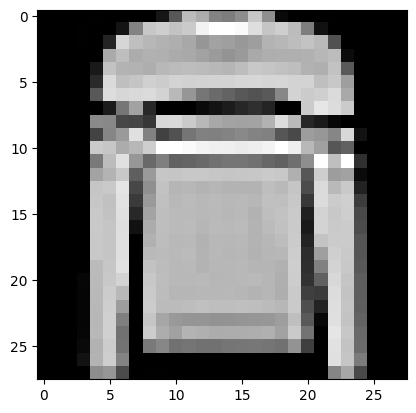

In [7]:
plt.imshow(single_image, cmap='gray')

**Data Preprocessing**

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
single_image.max()

255

In [11]:
single_image.min()

0

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
scaled_image = x_train[0]

In [14]:
scaled_image.max()

1.0

In [15]:
scaled_image.min()

0.0

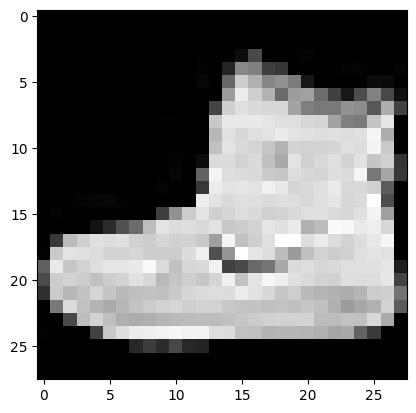

In [16]:
plt.imshow(scaled_image, cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [17]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test = x_test.reshape(10000,28,28,1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train.shape




(60000,)

In [24]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y_example.shape

(60000, 10)

In [26]:
y_cat_train = to_categorical(y_train,10)

In [27]:
y_cat_test = to_categorical(y_test,10)

In [28]:
single_image.max()

255

In [29]:
single_image.min()

0

**Modelling**

**TASK 6: Use Keras to create a model consisting of at least the following layers**

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [34]:
model.fit(x_train,y_cat_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.4043 - accuracy: 0.8549
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2802 - accuracy: 0.8995
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2391 - accuracy: 0.9130
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2130 - accuracy: 0.9216
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1916 - accuracy: 0.9292
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1759 - accuracy: 0.9354
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1595 - accuracy: 0.9418
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1473 - accuracy: 0.9466
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1351 - accuracy: 0.9507
Epoch 10/10
1875/1875 [==============================] - 36s 19m

**Evaluating the Model**

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.3262 - accuracy: 0.9132


[0.32619091868400574, 0.9132000207901001]

**Classification**

In [37]:
from sklearn.metrics import classification_report
import numpy as np

In [38]:
predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 7ms/step


In [39]:
report = classification_report(y_test, predictions_classes)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.83      0.85      1000
           3       0.91      0.92      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.76      0.77      0.77      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

